# American Sign Language Detection

## 1 Introduction and Setup

### 1.1 Module Imports

In [1]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Imports
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer

# Keras and Tensorflow imports
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

### 1.2 Data Import

In [2]:
train = pd.read_csv('data/sign_mnist_train.csv')
test = pd.read_csv('data/sign_mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
train.shape, test.shape

((27455, 785), (7172, 785))

### 1.3 Data Distribution Visualization

<Axes: ylabel='count'>

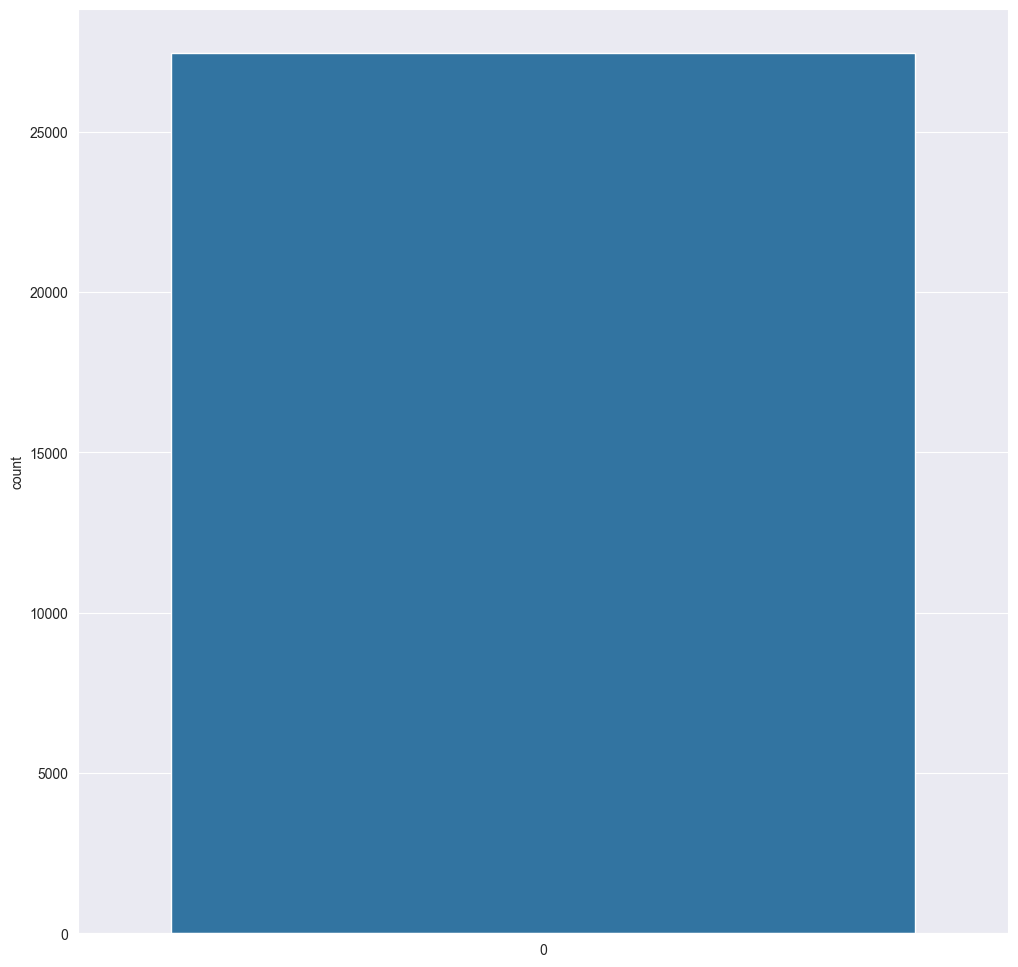

In [5]:
plt.figure(figsize=(12,12))
sns.set_style('darkgrid')
sns.countplot(train['label'])

### 1.4 Data Preprocessing

In [6]:
y_train = train['label']
y_test = test['label']

X_train = train.drop('label', axis=1)
X_test = test.drop('label', axis=1)

In [7]:
# Normalization of input data to 0-1 scale
X_train /= 255
X_test /= 255

In [8]:
#Binarization of the Data

labeller = LabelBinarizer()
y_train = labeller.fit_transform(y_train)
y_test = labeller.fit_transform(y_test)

In [9]:
# reshape the data (downsampling)

X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

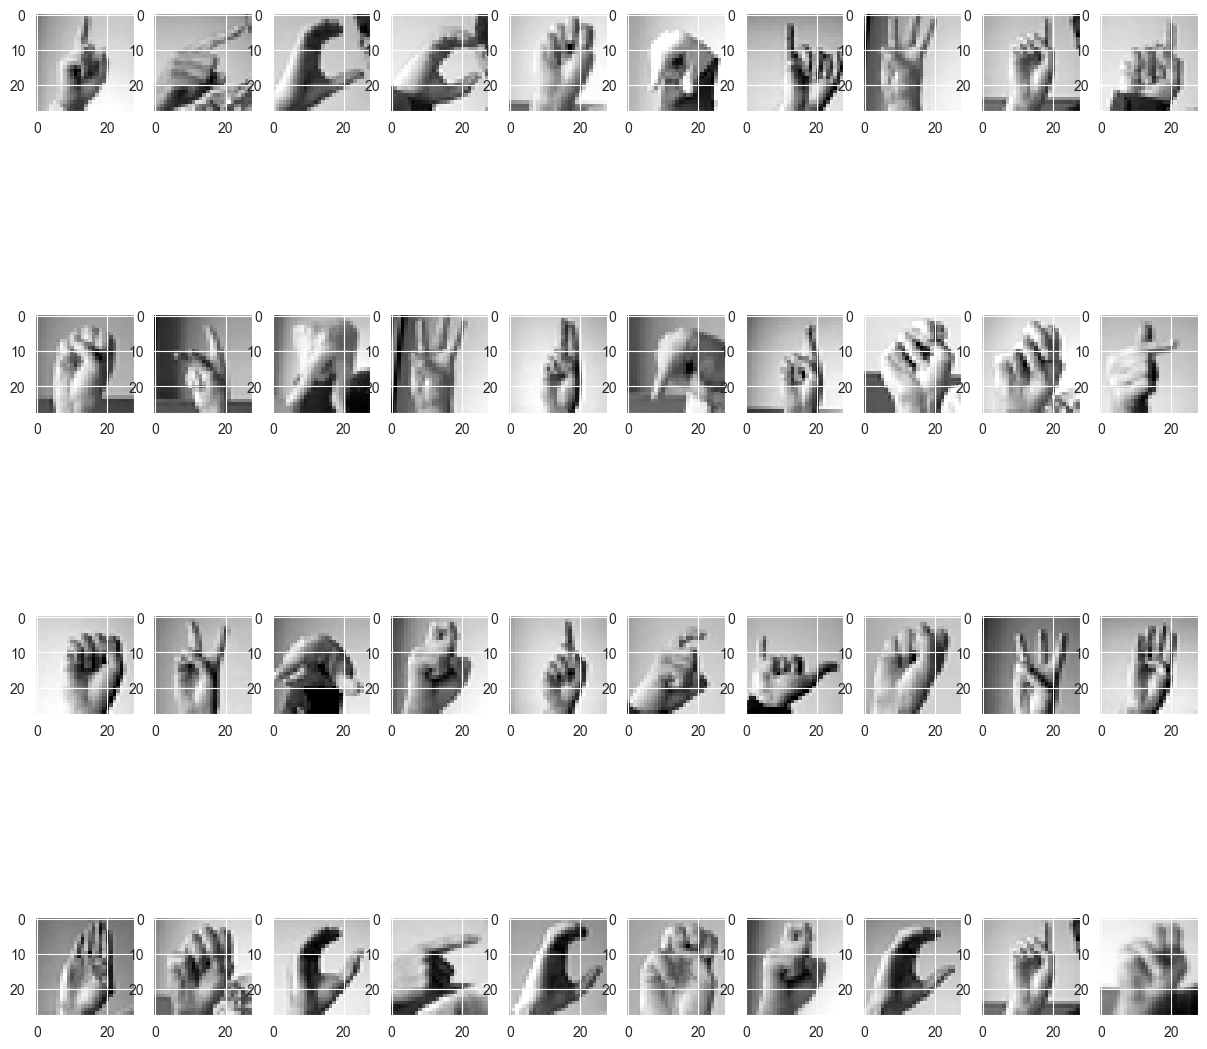

In [10]:
# Displayig some example images
plt.figure(figsize=(15,15))

x = 10
y = 4
for i in range(40):
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')

plt.show()

In [12]:
data_generator = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=.1,
    width_shift_range=.1,
    height_shift_range=.1,
    horizontal_flip=False,
    vertical_flip=False
)

data_generator.fit(X_train)

In [41]:
learning_rate = ReduceLROnPlateau(
    monitor='val_accuracy', 
    patience=2, 
    verbose=1, 
    factor=.5, 
    min_lr=.00001
)

In [23]:
model_1 = Sequential()
model_1.add(Conv2D(20,
                  kernel_size=(3,3),
                  activation='tanh',
                  input_shape=(28,28,1),
                  strides=1,
                  padding='same'
                  ))

model_1.add(MaxPool2D(pool_size=(3,3),
                      strides=2,
                      padding='same'
                      ))

model_1.add(Conv2D(30,
                  kernel_size=(3,3),
                  activation='tanh',
                  input_shape=(28,28,1),
                  strides=1,
                  padding='same'
                  ))


model_1.add(MaxPool2D(pool_size=(3,3),
                      strides=2,
                      padding='same'
                      ))

model_1.add(Flatten())
model_1.add(Dense(units=24, activation='softmax'))

In [24]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 20)        200       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 20)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 30)        5430      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 30)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1470)              0         
                                                                 
 dense_1 (Dense)             (None, 24)               

In [25]:
history = model_1.fit(data_generator.flow(X_train, y_train, batch_size=128), 
                    epochs=10, 
                    validation_data=(X_test, y_test),
                    # callbacks=[learning_rate]
                    )

Epoch 1/10
215/215 [==============================] - 21s 96ms/step - loss: 2.0881 - accuracy: 0.4013 - val_loss: 0.9494 - val_accuracy: 0.7235
Epoch 2/10
215/215 [==============================] - 21s 97ms/step - loss: 0.9728 - accuracy: 0.7156 - val_loss: 0.5313 - val_accuracy: 0.8410
Epoch 3/10
215/215 [==============================] - 19s 89ms/step - loss: 0.6362 - accuracy: 0.8131 - val_loss: 0.3722 - val_accuracy: 0.8862
Epoch 4/10
215/215 [==============================] - 22s 104ms/step - loss: 0.4773 - accuracy: 0.8626 - val_loss: 0.3013 - val_accuracy: 0.9183
Epoch 5/10
215/215 [==============================] - 21s 97ms/step - loss: 0.3913 - accuracy: 0.8872 - val_loss: 0.2274 - val_accuracy: 0.9442
Epoch 6/10
215/215 [==============================] - 21s 96ms/step - loss: 0.3226 - accuracy: 0.9069 - val_loss: 0.1946 - val_accuracy: 0.9484
Epoch 7/10
215/215 [==============================] - 22s 104ms/step - loss: 0.2751 - accuracy: 0.9211 - val_loss: 0.1564 - val_accurac

In [26]:
print("Accuracy: ", model_1.evaluate(X_test, y_test)[1]*100, "%")

225/225 [==============================] - 2s 8ms/step - loss: 0.1176 - accuracy: 0.9746
Accuracy:  97.46235609054565 %


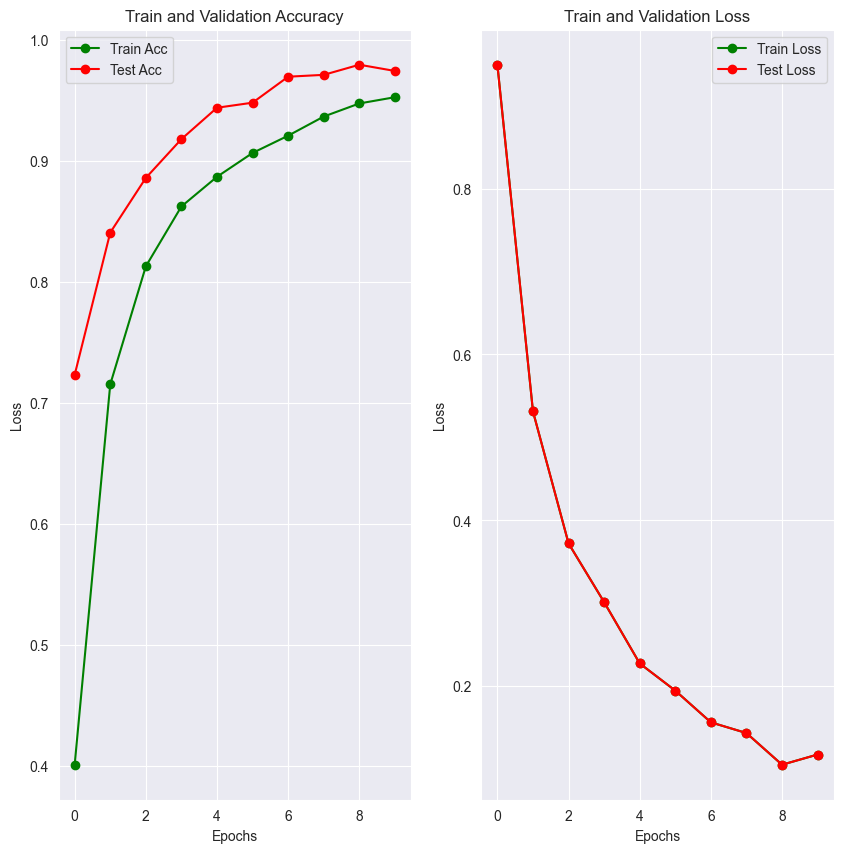

In [27]:
epochs = [i for i in range(10)]

fig,ax= plt.subplots(1,2)
train_acc= history.history['accuracy']
train_loss= history.history['loss']
vall_acc= history.history['val_accuracy']
vall_loss=history.history['val_loss']
fig.set_size_inches(10,10)

ax[0].plot(epochs, train_acc, 'go-', label='Train Acc')
ax[0].plot(epochs, vall_acc, 'ro-', label= 'Test Acc')
ax[0].set_title('Train and Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

ax[1].plot(epochs, vall_loss, 'go-', label='Train Loss')
ax[1].plot(epochs, vall_loss, 'ro-', label= 'Test Loss')
ax[1].set_title('Train and Validation Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

plt.show()

In [29]:
# Adjusting the size of the Conv2D layers
model_2 = Sequential()
model_2.add(Conv2D(25,
                  kernel_size=(3,3),
                  activation='relu',
                  input_shape=(28,28,1),
                  strides=1,
                  padding='same'
                  ))

model_2.add(MaxPool2D(pool_size=(3,3),
                      strides=2,
                      padding='same'
                      ))

model_2.add(Conv2D(35,
                  kernel_size=(3,3),
                  activation='relu',
                  input_shape=(28,28,1),
                  strides=1,
                  padding='same'
                  ))


model_2.add(MaxPool2D(pool_size=(3,3),
                      strides=2,
                      padding='same'
                      ))

model_2.add(Flatten())
model_2.add(Dense(units=24, activation='softmax'))

In [31]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 25)        250       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 25)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 35)        7910      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 35)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1715)              0         
                                                                 
 dense_2 (Dense)             (None, 24)               

In [32]:
history_2 = model_2.fit(data_generator.flow(X_train, y_train, batch_size=128), 
                    epochs=10, 
                    validation_data=(X_test, y_test),
                    # callbacks=[learning_rate]
                    )

Epoch 1/10
215/215 [==============================] - 23s 106ms/step - loss: 2.1385 - accuracy: 0.3770 - val_loss: 0.8538 - val_accuracy: 0.7263
Epoch 2/10
215/215 [==============================] - 23s 108ms/step - loss: 0.8895 - accuracy: 0.7267 - val_loss: 0.4591 - val_accuracy: 0.8602
Epoch 3/10
215/215 [==============================] - 22s 104ms/step - loss: 0.5802 - accuracy: 0.8189 - val_loss: 0.3130 - val_accuracy: 0.9144
Epoch 4/10
215/215 [==============================] - 22s 102ms/step - loss: 0.4194 - accuracy: 0.8723 - val_loss: 0.2301 - val_accuracy: 0.9293
Epoch 5/10
215/215 [==============================] - 23s 106ms/step - loss: 0.3239 - accuracy: 0.9015 - val_loss: 0.1441 - val_accuracy: 0.9619
Epoch 6/10
215/215 [==============================] - 23s 105ms/step - loss: 0.2730 - accuracy: 0.9185 - val_loss: 0.1340 - val_accuracy: 0.9622
Epoch 7/10
215/215 [==============================] - 23s 105ms/step - loss: 0.2347 - accuracy: 0.9292 - val_loss: 0.0992 - val_ac

In [34]:
print("Accuracy: ", model_2.evaluate(X_test, y_test)[1]*100, "%")

225/225 [==============================] - 2s 10ms/step - loss: 0.0692 - accuracy: 0.9833
Accuracy:  98.32682609558105 %


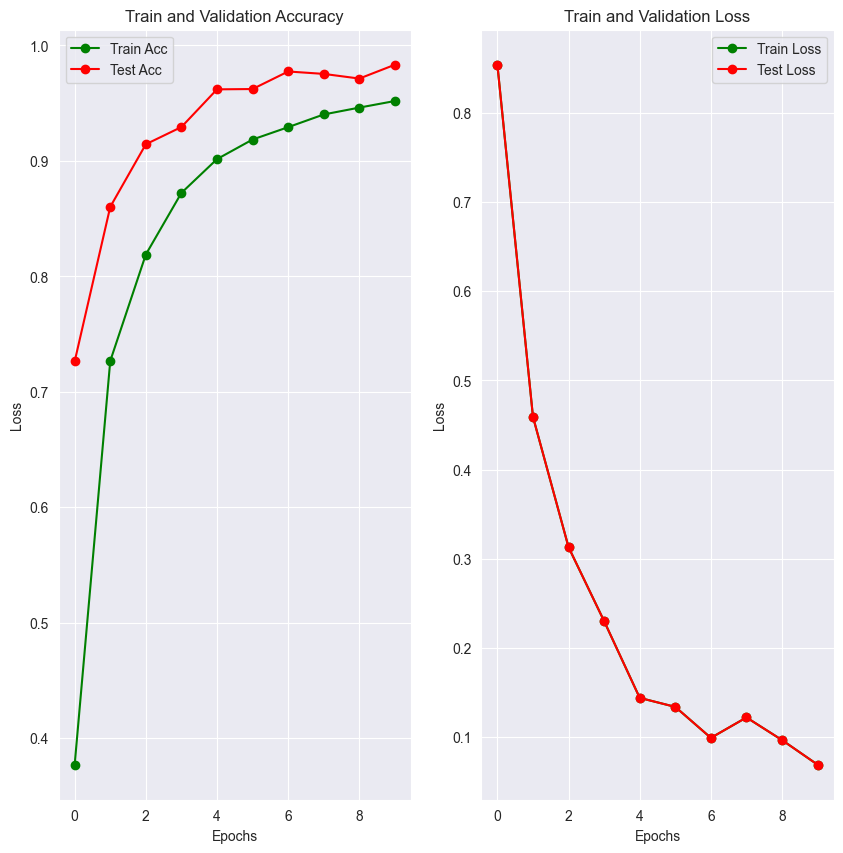

In [36]:
epochs = [i for i in range(10)]

fig,ax= plt.subplots(1,2)
train_acc= history_2.history['accuracy']
train_loss= history_2.history['loss']
vall_acc= history_2.history['val_accuracy']
vall_loss=history_2.history['val_loss']
fig.set_size_inches(10,10)

ax[0].plot(epochs, train_acc, 'go-', label='Train Acc')
ax[0].plot(epochs, vall_acc, 'ro-', label= 'Test Acc')
ax[0].set_title('Train and Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

ax[1].plot(epochs, vall_loss, 'go-', label='Train Loss')
ax[1].plot(epochs, vall_loss, 'ro-', label= 'Test Loss')
ax[1].set_title('Train and Validation Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

plt.show()

In [55]:
# Adjusting the model to include normalization and dropout
model_3 = Sequential()
model_3.add(Conv2D(30,
                  kernel_size=(3,3),
                  activation='relu',
                  input_shape=(28,28,1),
                  strides=1,
                  padding='same'
                  ))

model_3.add(BatchNormalization())

model_3.add(MaxPool2D(pool_size=(3,3),
                      strides=2,
                      padding='same'
                      ))

model_3.add(Conv2D(40,
                  kernel_size=(3,3),
                  activation='relu',
                  input_shape=(28,28,1),
                  strides=1,
                  padding='same'
                  ))

model_3.add(Dropout(.2))
model_3.add(BatchNormalization())

model_3.add(MaxPool2D(pool_size=(3,3),
                      strides=2,
                      padding='same'
                      ))

model_3.add(Flatten())
model_3.add(Dense(units=24, activation='softmax'))

In [56]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 30)        300       
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 30)       120       
 hNormalization)                                                 
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 30)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 40)        10840     
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 40)        0         
                                                                 
 batch_normalization_7 (Batc  (None, 14, 14, 40)      

In [57]:
history_3 = model_3.fit(data_generator.flow(X_train, y_train, batch_size=128), 
                        epochs=10, 
                        validation_data=(X_test, y_test), 
                        callbacks=[learning_rate])

Epoch 1/10
215/215 [==============================] - 38s 169ms/step - loss: 1.0115 - accuracy: 0.6948 - val_loss: 2.7108 - val_accuracy: 0.1362 - lr: 0.0010
Epoch 2/10
215/215 [==============================] - 33s 155ms/step - loss: 0.2565 - accuracy: 0.9171 - val_loss: 1.1554 - val_accuracy: 0.6603 - lr: 0.0010
Epoch 3/10
215/215 [==============================] - 36s 168ms/step - loss: 0.1451 - accuracy: 0.9539 - val_loss: 0.1549 - val_accuracy: 0.9470 - lr: 0.0010
Epoch 4/10
215/215 [==============================] - 34s 156ms/step - loss: 0.0918 - accuracy: 0.9702 - val_loss: 0.1019 - val_accuracy: 0.9681 - lr: 0.0010
Epoch 5/10
215/215 [==============================] - 35s 161ms/step - loss: 0.0871 - accuracy: 0.9718 - val_loss: 0.0877 - val_accuracy: 0.9643 - lr: 0.0010
Epoch 6/10
215/215 [==============================] - 38s 177ms/step - loss: 0.0628 - accuracy: 0.9798 - val_loss: 0.0441 - val_accuracy: 0.9886 - lr: 0.0010
Epoch 7/10
215/215 [==============================] 

In [58]:
print("Accuracy of the model is: ", model_3.evaluate(X_test, y_test)[1]*100, '%')

225/225 [==============================] - 3s 12ms/step - loss: 0.0120 - accuracy: 0.9967
Accuracy of the model is:  99.665367603302 %


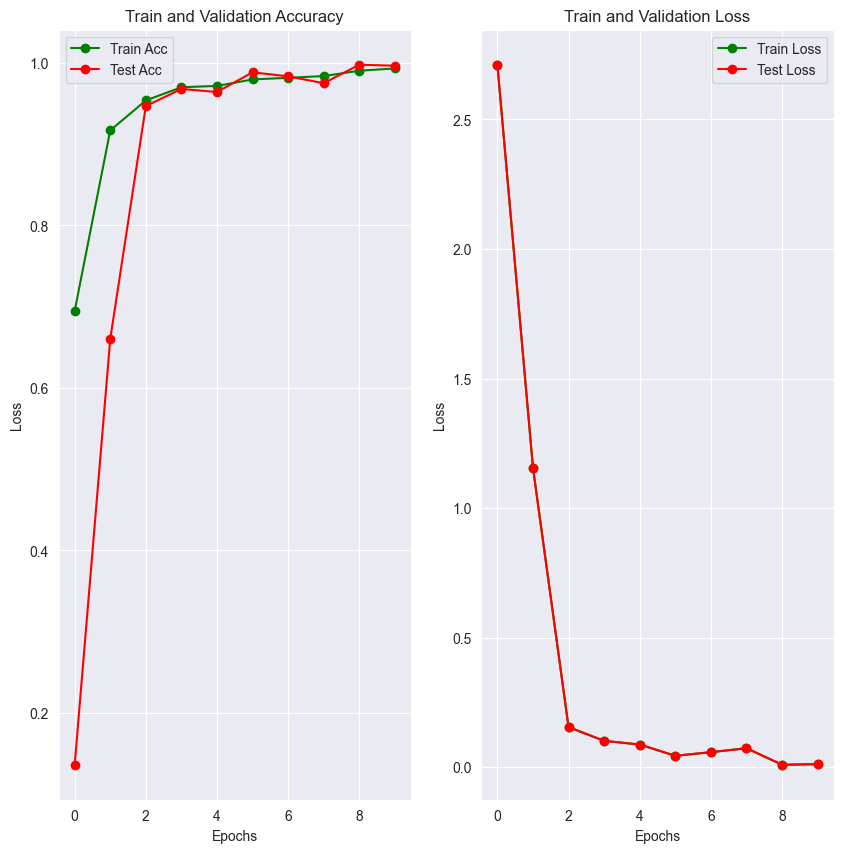

In [59]:
epochs = [i for i in range(10)]

fig,ax= plt.subplots(1,2)
train_acc= history_3.history['accuracy']
train_loss= history_3.history['loss']
vall_acc= history_3.history['val_accuracy']
vall_loss=history_3.history['val_loss']
fig.set_size_inches(10,10)

ax[0].plot(epochs, train_acc, 'go-', label='Train Acc')
ax[0].plot(epochs, vall_acc, 'ro-', label= 'Test Acc')
ax[0].set_title('Train and Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

ax[1].plot(epochs, vall_loss, 'go-', label='Train Loss')
ax[1].plot(epochs, vall_loss, 'ro-', label= 'Test Loss')
ax[1].set_title('Train and Validation Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

plt.show()